In [1]:
import numpy as np
import pandas as pd

In [2]:
"""
Feature extraction from each activity
"""

def features(dataframe):
    """
    Select columns for each activity
    """
    dataframe = dataframe.reset_index(drop=True)
    df = dataframe.drop('label', axis=1)   # drop the column of activity label
    act_label = dataframe.label      # to be uncommented if file contains a column of activity labels


    """
    Spatial joint distance features:From activities data compute spatial joint distance features for the activities by calculating
    euclidean distance between specified joint coordinates
    """
    SJD_feat_1 = np.sqrt((df.rhandX - df.lhandX)**2 + (df.rhandY - df.lhandY)**2 + (df.rhandZ - df.lhandZ)**2)                  # distance between left and right hand
    SJD_feat_2 = np.sqrt((df.rhandX - df.headX)**2 + (df.rhandY - df.headY)**2 + (df.rhandZ - df.headZ)**2)                     # distance between right hand and head
    SJD_feat_3 = np.sqrt((df.lhandX - df.headX)**2 + (df.lhandY - df.headY)**2 + (df.lhandZ - df.headZ)**2)                     # distance between left hand and head
    SJD_feat_4 = np.sqrt((df.rhipX - df.rfootX)**2 + (df.rhipY - df.rfootY)**2 + (df.rhipZ - df.rfootZ)**2)                     # distance between right hip and right foot
    SJD_feat_5 = np.sqrt((df.lhipX - df.lfootX)**2 + (df.lhipY - df.lfootY)**2 + (df.lhipZ - df.lfootZ)**2)                     # distance between left hip and left foot
    SJD_feat_6 = np.sqrt((df.rshouldX - df.rfootX)**2 + (df.rshouldY - df.rfootY)**2 + (df.rshouldZ - df.rfootZ)**2)            # distance between right shoulder and right foot
    SJD_feat_7 = np.sqrt((df.lshouldX - df.lfootX)**2 + (df.lshouldY - df.lfootY)**2 + (df.lshouldZ - df.lfootZ)**2)            # distance between left shoulder and left foot
    SJD_feat_8 = np.sqrt((df.lhandX - df.lfootX)**2 + (df.lhandY - df.lfootY)**2 + (df.lhandZ - df.lfootZ)**2)                  # distance between left hand and left foot
    SJD_feat_9 = np.sqrt((df.rhandX - df.rfootX)**2 + (df.rhandY - df.rfootY)**2 + (df.rhandZ - df.rfootZ)**2)                  # distance between right hand and right foot
    # consider including euclidean distance of each joint to the torso center coordinates as a feature

    euclid_dist = pd.DataFrame({'SJD_feat_1': SJD_feat_1, 'SJD_feat_2': SJD_feat_2, 'SJD_feat_3': SJD_feat_3, 'SJD_feat_4': SJD_feat_4, 'SJD_feat_5': SJD_feat_5, 'SJD_feat_6': SJD_feat_6, 'SJD_feat_7': SJD_feat_7, 'SJD_feat_8': SJD_feat_8, 'SJD_feat_9': SJD_feat_9})


    """
    Temporal joint displacement : temporal location difference of same body joint in the current frame with respect to the prev frame
    """
    temp_joint_disp = df.diff()                             # calculate the difference between two frames of activity
    temp_joint_disp = temp_joint_disp.fillna(0)         # replace NaN values with 0 (i.e. the first row whose difference initially = 0)
    temp_joint_disp = temp_joint_disp.rename(columns={"headX": "temp_headX", "headY": "temp_headY", "headZ": "temp_headZ", "neckX": "temp_neckX", "neckY": "temp_neckY", "neckZ": "temp_neckZ",
                                                      "torsoX": "temp_torsoX", "torsoY": "temp_torsoY", "torsoZ": "temp_torsoZ", "lshouldX": "temp_lshouldX", "lshouldY": "temp_lshouldY", "lshouldZ": "temp_lshouldZ",
                                                      "lelbowX": "temp_lelbowX", "lelbowY": "temp_lelbowY", "lelbowZ": "temp_lelbowZ", "rshouldX": "temp_rshouldX", "rshouldY": "temp_rshouldY", "rshouldZ": "temp_rshouldZ",
                                                      "relbowX": "temp_relbowX", "relbowY": "temp_relbowY", "relbowZ": "temp_relbowZ", "lhipX": "temp_lhipX", "lhipY": "temp_lhipY", "lhipZ": "temp_lhipZ", "lkneeX": "temp_lkneeX",
                                                      "lkneeY": "temp_lkneeY", "lkneeZ": "temp_lkneeZ", "rhipX": "temp_rhipX", "rhipY": "temp_rhipY", "rhipZ": "temp_rhipZ", "rkneeX": "temp_rkneeX", "rkneeY": "temp_rkneeY",
                                                      "rkneeZ": "temp_rkneeZ", "lhandX": "temp_lhandX", "lhandY": "temp_lhandY", "lhandZ": "temp_lhandZ", "rhandX": "temp_rhandX", "rhandY": "temp_rhandY", "rhandZ": "temp_rhandZ",
                                                      "lfootX": "temp_lfootX", "lfootY": "temp_lfootY", "lfootZ": "temp_lfootZ", "rfootX": "temp_rfootX", "rfootY": "temp_rfootY", "rfootZ": "temp_rfootZ"})

    """
    Long term temporal joint displacement: temporal location difference of joints between the current frame (frame n) and the initial frame (frame 1)
    """
    long_temp_disp = df - df.iloc[0]
    long_temp_disp = long_temp_disp.rename(columns={"headX": "Ltemp_headX", "headY": "Ltemp_headY", "headZ": "Ltemp_headZ", "neckX": "Ltemp_neckX", "neckY": "Ltemp_neckY", "neckZ": "Ltemp_neckZ",
                                                    "torsoX": "Ltemp_torsoX", "torsoY": "Ltemp_torsoY", "torsoZ": "Ltemp_torsoZ", "lshouldX": "Ltemp_lshouldX", "lshouldY": "Ltemp_lshouldY", "lshouldZ": "Ltemp_lshouldZ",
                                                    "lelbowX": "Ltemp_lelbowX", "lelbowY": "Ltemp_lelbowY", "lelbowZ": "Ltemp_lelbowZ", "rshouldX": "Ltemp_rshouldX", "rshouldY": "Ltemp_rshouldY", "rshouldZ": "Ltemp_rshouldZ",
                                                    "relbowX": "Ltemp_relbowX", "relbowY": "Ltemp_relbowY", "relbowZ": "Ltemp_relbowZ", "lhipX": "Ltemp_lhipX", "lhipY": "Ltemp_lhipY", "lhipZ": "Ltemp_lhipZ", "lkneeX": "Ltemp_lkneeX",
                                                    "lkneeY": "Ltemp_lkneeY", "lkneeZ": "Ltemp_lkneeZ", "rhipX": "Ltemp_rhipX", "rhipY": "Ltemp_rhipY", "rhipZ": "Ltemp_rhipZ", "rkneeX": "Ltemp_rkneeX", "rkneeY": "Ltemp_rkneeY",
                                                    "rkneeZ": "Ltemp_rkneeZ", "lhandX": "Ltemp_lhandX", "lhandY": "Ltemp_lhandY", "lhandZ": "Ltemp_lhandZ", "rhandX": "Ltemp_rhandX", "rhandY": "Ltemp_rhandY", "rhandZ": "Ltemp_rhandZ",
                                                    "lfootX": "Ltemp_lfootX", "lfootY": "Ltemp_lfootY", "lfootZ": "Ltemp_lfootZ", "rfootX": "Ltemp_rfootX", "rfootY": "Ltemp_rfootY", "rfootZ": "Ltemp_rfootZ"})

    """
    Mean across each frame of activity
    """
    Mean = df.mean(axis=0)
    Mean = pd.DataFrame(Mean)
    Mean = Mean.T
    Mean = Mean.rename(columns={"headX": "mean_headX", "headY": "mean_headY", "headZ": "mean_headZ", "neckX": "mean_neckX", "neckY": "mean_neckY", "neckZ": "mean_neckZ",
                                                    "torsoX": "mean_torsoX", "torsoY": "mean_torsoY", "torsoZ": "mean_torsoZ", "lshouldX": "mean_lshouldX", "lshouldY": "mean_lshouldY", "lshouldZ": "mean_lshouldZ",
                                                    "lelbowX": "mean_lelbowX", "lelbowY": "mean_lelbowY", "lelbowZ": "mean_lelbowZ", "rshouldX": "mean_rshouldX", "rshouldY": "mean_rshouldY", "rshouldZ": "mean_rshouldZ",
                                                    "relbowX": "mean_relbowX", "relbowY": "mean_relbowY", "relbowZ": "mean_relbowZ", "lhipX": "mean_lhipX", "lhipY": "mean_lhipY", "lhipZ": "mean_lhipZ", "lkneeX": "mean_lkneeX",
                                                    "lkneeY": "mean_lkneeY", "lkneeZ": "mean_lkneeZ", "rhipX": "mean_rhipX", "rhipY": "mean_rhipY", "rhipZ": "mean_rhipZ", "rkneeX": "mean_rkneeX", "rkneeY": "mean_rkneeY",
                                                    "rkneeZ": "mean_rkneeZ", "lhandX": "mean_lhandX", "lhandY": "mean_lhandY", "lhandZ": "mean_lhandZ", "rhandX": "mean_rhandX", "rhandY": "mean_rhandY", "rhandZ": "mean_rhandZ",
                                                    "lfootX": "mean_lfootX", "lfootY": "mean_lfootY", "lfootZ": "mean_lfootZ", "rfootX": "mean_rfootX", "rfootY": "mean_rfootY", "rfootZ": "mean_rfootZ"})
    meanFeat = pd.DataFrame(df.values - Mean.values,
                            columns=Mean.columns)  # combine mean and df in order to find the difference of each column from its mean

    """
    Variance across each sample
    """
    Variance = df.var(axis=0)
    Variance = pd.DataFrame(Variance)
    Variance = Variance.T
    Variance = Variance.rename(columns={"headX": "var_headX", "headY": "var_headY", "headZ": "var_headZ", "neckX": "var_neckX", "neckY": "var_neckY", "neckZ": "var_neckZ",
                                                    "torsoX": "var_torsoX", "torsoY": "var_torsoY", "torsoZ": "var_torsoZ", "lshouldX": "var_lshouldX", "lshouldY": "var_lshouldY", "lshouldZ": "var_lshouldZ",
                                                    "lelbowX": "var_lelbowX", "lelbowY": "var_lelbowY", "lelbowZ": "var_lelbowZ", "rshouldX": "var_rshouldX", "rshouldY": "var_rshouldY", "rshouldZ": "var_rshouldZ",
                                                    "relbowX": "var_relbowX", "relbowY": "var_relbowY", "relbowZ": "var_relbowZ", "lhipX": "var_lhipX", "lhipY": "var_lhipY", "lhipZ": "var_lhipZ", "lkneeX": "var_lkneeX",
                                                    "lkneeY": "var_lkneeY", "lkneeZ": "var_lkneeZ", "rhipX": "var_rhipX", "rhipY": "var_rhipY", "rhipZ": "var_rhipZ", "rkneeX": "var_rkneeX", "rkneeY": "var_rkneeY",
                                                    "rkneeZ": "var_rkneeZ", "lhandX": "var_lhandX", "lhandY": "var_lhandY", "lhandZ": "var_lhandZ", "rhandX": "var_rhandX", "rhandY": "var_rhandY", "rhandZ": "var_rhandZ",
                                                    "lfootX": "var_lfootX", "lfootY": "var_lfootY", "lfootZ": "var_lfootZ", "rfootX": "var_rfootX", "rfootY": "var_rfootY", "rfootZ": "var_rfootZ"})
    varFeat = pd.DataFrame(df.values - Variance.values, columns=Variance.columns)

    """
    Standard deviation across each sample
    """
    Std_deviatn = df.std(axis=0)
    Std_deviatn = pd.DataFrame(Std_deviatn)
    Std_deviatn = Std_deviatn.T
    Std_deviatn = Std_deviatn.rename(columns={"headX": "std_headX", "headY": "std_headY", "headZ": "std_headZ", "neckX": "std_neckX", "neckY": "std_neckY", "neckZ": "std_neckZ",
                                                    "torsoX": "std_torsoX", "torsoY": "std_torsoY", "torsoZ": "std_torsoZ", "lshouldX": "std_lshouldX", "lshouldY": "std_lshouldY", "lshouldZ": "std_lshouldZ",
                                                    "lelbowX": "std_lelbowX", "lelbowY": "std_lelbowY", "lelbowZ": "std_lelbowZ", "rshouldX": "std_rshouldX", "rshouldY": "std_rshouldY", "rshouldZ": "std_rshouldZ",
                                                    "relbowX": "std_relbowX", "relbowY": "std_relbowY", "relbowZ": "std_relbowZ", "lhipX": "std_lhipX", "lhipY": "std_lhipY", "lhipZ": "std_lhipZ", "lkneeX": "std_lkneeX",
                                                    "lkneeY": "std_lkneeY", "lkneeZ": "std_lkneeZ", "rhipX": "std_rhipX", "rhipY": "std_rhipY", "rhipZ": "std_rhipZ", "rkneeX": "std_rkneeX", "rkneeY": "std_rkneeY",
                                                    "rkneeZ": "std_rkneeZ", "lhandX": "std_lhandX", "lhandY": "std_lhandY", "lhandZ": "std_lhandZ", "rhandX": "std_rhandX", "rhandY": "std_rhandY", "rhandZ": "std_rhandZ",
                                                    "lfootX": "std_lfootX", "lfootY": "std_lfootY", "lfootZ": "std_lfootZ", "rfootX": "std_rfootX", "rfootY": "std_rfootY", "rfootZ": "std_rfootZ"})
    stdFeat = pd.DataFrame(df.values - Std_deviatn.values, columns=Std_deviatn.columns)

    """
    Skewness of each frame
    """
    Skewness = df.skew(axis=0)
    Skewness = pd.DataFrame(Skewness)
    Skewness = Skewness.T
    Skewness = Skewness.rename(columns={"headX": "skw_headX", "headY": "skw_headY", "headZ": "skw_headZ", "neckX": "skw_neckX", "neckY": "skw_neckY", "neckZ": "skw_neckZ",
                                                    "torsoX": "skw_torsoX", "torsoY": "skw_torsoY", "torsoZ": "skw_torsoZ", "lshouldX": "skw_lshouldX", "lshouldY": "skw_lshouldY", "lshouldZ": "skw_lshouldZ",
                                                    "lelbowX": "skw_lelbowX", "lelbowY": "skw_lelbowY", "lelbowZ": "skw_lelbowZ", "rshouldX": "skw_rshouldX", "rshouldY": "skw_rshouldY", "rshouldZ": "skw_rshouldZ",
                                                    "relbowX": "skw_relbowX", "relbowY": "skw_relbowY", "relbowZ": "skw_relbowZ", "lhipX": "skw_lhipX", "lhipY": "skw_lhipY", "lhipZ": "skw_lhipZ", "lkneeX": "skw_lkneeX",
                                                    "lkneeY": "skw_lkneeY", "lkneeZ": "skw_lkneeZ", "rhipX": "skw_rhipX", "rhipY": "skw_rhipY", "rhipZ": "skw_rhipZ", "rkneeX": "skw_rkneeX", "rkneeY": "skw_rkneeY",
                                                    "rkneeZ": "skw_rkneeZ", "lhandX": "skw_lhandX", "lhandY": "skw_lhandY", "lhandZ": "skw_lhandZ", "rhandX": "skw_rhandX", "rhandY": "skw_rhandY", "rhandZ": "skw_rhandZ",
                                                    "lfootX": "skw_lfootX", "lfootY": "skw_lfootY", "lfootZ": "skw_lfootZ", "rfootX": "skw_rfootX", "rfootY": "skw_rfootY", "rfootZ": "skw_rfootZ"})
    skwFeat = pd.DataFrame(df.values - Skewness.values, columns=Skewness.columns)

    """
    Kurtosis
    """
    Kurtosis = df.kurtosis(axis=0)
    Kurtosis = pd.DataFrame(Kurtosis)
    Kurtosis = Kurtosis.T
    Kurtosis = Kurtosis.rename(columns={"headX": "kur_headX", "headY": "kur_headY", "headZ": "kur_headZ", "neckX": "kur_neckX", "neckY": "kur_neckY", "neckZ": "kur_neckZ",
                                                    "torsoX": "kur_torsoX", "torsoY": "kur_torsoY", "torsoZ": "kur_torsoZ", "lshouldX": "kur_lshouldX", "lshouldY": "kur_lshouldY", "lshouldZ": "kur_lshouldZ",
                                                    "lelbowX": "kur_lelbowX", "lelbowY": "kur_lelbowY", "lelbowZ": "kur_lelbowZ", "rshouldX": "kur_rshouldX", "rshouldY": "kur_rshouldY", "rshouldZ": "kur_rshouldZ",
                                                    "relbowX": "kur_relbowX", "relbowY": "kur_relbowY", "relbowZ": "kur_relbowZ", "lhipX": "kur_lhipX", "lhipY": "kur_lhipY", "lhipZ": "kur_lhipZ", "lkneeX": "kur_lkneeX",
                                                    "lkneeY": "kur_lkneeY", "lkneeZ": "kur_lkneeZ", "rhipX": "kur_rhipX", "rhipY": "kur_rhipY", "rhipZ": "kur_rhipZ", "rkneeX": "kur_rkneeX", "rkneeY": "kur_rkneeY",
                                                    "rkneeZ": "kur_rkneeZ", "lhandX": "kur_lhandX", "lhandY": "kur_lhandY", "lhandZ": "kur_lhandZ", "rhandX": "kur_rhandX", "rhandY": "kur_rhandY", "rhandZ": "kur_rhandZ",
                                                    "lfootX": "kur_lfootX", "lfootY": "kur_lfootY", "lfootZ": "kur_lfootZ", "rfootX": "kur_rfootX", "rfootY": "kur_rfootY", "rfootZ": "kur_rfootZ"})
    kurFeat = pd.DataFrame(df.values - Kurtosis.values, columns=Kurtosis.columns)

    """
    More Features...
    """

    """
    Combine all features into one feature dataframe
    """
    comb_feat = pd.concat([euclid_dist, temp_joint_disp, long_temp_disp, meanFeat, varFeat, stdFeat, skwFeat, kurFeat, act_label], axis=1)

    return comb_feat

In [3]:
"""
Compute features for all persons and all activities (excluding the random activity)
"""
def compute_features(filename): # pass an array holding names of all files containing activity data
    num_of_files = len(filename)    #hold number of files containing activities data

    # read file into a dataframe
    for i in range(0, num_of_files):
        activity_df = pd.read_csv(filename[i])

        # for loop to handle all activities from CAD-60 dataset
        # The range stands for the activity labels or classes 1-12 plus 13 for random activity
        num_of_classes = activity_df.label.max()
        # extract features using a time window approach
        for x in range(1, num_of_classes):
            dataframe = activity_df[activity_df.label == x]
            #print(dataframe)
            Ex_feat = features(dataframe)
            if (x == 1) and (i == 0):
                feat = Ex_feat
            else:
                feat = pd.concat([feat, Ex_feat], axis=0) #cumulate features extracted
            
    #seperate features from labels and normalize
    new_feat = feat.drop('label', 1)
    new_feat = new_feat.fillna(method='ffill')
    label = feat.label #activity label
    
    new_feat_norm = (new_feat - new_feat.min()) / (new_feat.max() - new_feat.min())
    new_feat_norm = new_feat_norm.fillna(0)
    
    
    return new_feat_norm, label, new_feat

"""
Activity labels for CAD-60:
Rinsing Mouth   -   1
Brusthing Teeth -   2
Wearing Lenses  -   3
Talking on phone-   4
Drinking water  -   5
Open pill cont  -   6
Cooking (chop)  -   7
Cooking (stir)  -   8
Talking on couch-   9
Relax on couch  -   10
Write on board  -   11
Work on comp    -   12
Random+ still   -   13
"""

'\nActivity labels for CAD-60:\nRinsing Mouth   -   1\nBrusthing Teeth -   2\nWearing Lenses  -   3\nTalking on phone-   4\nDrinking water  -   5\nOpen pill cont  -   6\nCooking (chop)  -   7\nCooking (stir)  -   8\nTalking on couch-   9\nRelax on couch  -   10\nWrite on board  -   11\nWork on comp    -   12\nRandom+ still   -   13\n'

In [4]:
"""
Read in data file and compute features from activity data
"""
file = ['C:\\Users\\n0691844\\Dropbox\\PhD personal docs\\Resources\\Cornell Univ data set\\person1.csv']
my_features, my_labels, raw_features = compute_features(file)
print(my_features)

      SJD_feat_1  SJD_feat_2  SJD_feat_3  SJD_feat_4  SJD_feat_5  SJD_feat_6  \
0       0.599825    0.893159    0.243746    0.809714    0.919385    0.866685   
1       0.598947    0.892604    0.247316    0.819143    0.924248    0.869313   
2       0.600780    0.904931    0.257268    0.803050    0.929204    0.864449   
3       0.586680    0.896435    0.274151    0.814082    0.919353    0.865948   
4       0.583339    0.891410    0.282056    0.824411    0.920438    0.874016   
5       0.575197    0.888410    0.297439    0.816680    0.915194    0.872679   
6       0.563248    0.887807    0.317343    0.812905    0.912301    0.867870   
7       0.542259    0.887245    0.337552    0.825742    0.915031    0.887016   
8       0.525993    0.887446    0.356229    0.836192    0.916091    0.891658   
9       0.508758    0.887456    0.379238    0.833357    0.919973    0.881590   
10      0.500555    0.887045    0.390450    0.818690    0.919077    0.863859   
11      0.488391    0.887213    0.405781

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
#%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

"""
This function extracts key poses from a human activity data file
"""
def keypose(filename):
    #data from csv file with filename = filename
    activity_df = pd.read_csv(filename)
    # number of classes = number of activities within each file
    num_of_classes = activity_df.label.max()
    
    # for each class, extract joint coordinates for processing
    # to calculate K.E 1/2(v^2)
    for x in range(1, (num_of_classes + 1)):
        class_df_active = activity_df[activity_df.label == x]
        """
        calculating velocity of each joint dimension dist/time
        using a sampling time interval of 0.033 secs
        """
        class_label = class_df_active.label
        class_df = class_df_active.drop('label', axis=1)   # drop column with class label

        #class_df = class_df.rolling(window=30).mean()         # simple moving average to smoothing data
        coord_dist = class_df.diff().fillna(0)                # diff between each frame and its preceding frame and fill NaNs with 0
        coord_dist = coord_dist.rolling(window=30).mean()
        # compute joint distances over time
        coord_dist = coord_dist ** 2                          # square each value used to compute euclidean distance of a joint movement over time
        # print("coordinate distance %s" % coord_dist)
        for i in range(0, len(coord_dist.columns), 3):
            euclid_dist = np.sqrt(coord_dist.iloc[:, i] + coord_dist.iloc[:, (i+1)] + coord_dist.iloc[:, (i+2)])    # from second frame calculate each joint distance across each frame
            if i == 0:
                joint_dist = euclid_dist
            else:
                joint_dist = pd.concat([joint_dist, euclid_dist], axis=1)
        velocity2 = ((joint_dist / 100)) #/ 0.033)      # convert to meter / second
        K_E = (((velocity2.sum(axis=1) ** 2) / 2).reset_index(drop=True))
        K_E_sma = K_E.rolling(window=15).mean()
        K_E_ema = K_E.rolling(window=30).mean()

        # plot kinetic energy vs frame number
        cumu_diff_KE = K_E - K_E.loc[30]
        diff_sum = cumu_diff_KE.loc[30:len(cumu_diff_KE)].sum()

        #locate crossovers 
        idx = np.argwhere(np.diff(np.sign(K_E_sma - K_E_ema)) != 0).reshape(-1) + 0 #find the crossover points of the moving averages
        idx = idx[29:len(idx)]
        #print('Index positions of key poses in an activity: %s' % idx)
        
        #get data of the selected key poses
        extract_poses = class_df_active.iloc[idx]
        if x == 5:
            key_pose = extract_poses
            pose_index = idx
            print('Index positions of key poses in an activity: %s' % idx)
        #else:
        #    key_pose = pd.concat([key_pose, extract_poses], axis=0)
        #print(key_pose)
        
        if x == 5:
            plt.figure(figsize=(15,5))
            
            #plt.subplot(121)
            raw_plt = plt.plot(K_E.index[30:len(K_E.index)], K_E[30:len(K_E.index)], color='black')
            plt.xlabel('frame number')
            plt.ylabel('Kinetic energy')
            
            #plt.subplot(122)
            sh_sma = plt.plot(K_E.index[30:len(K_E.index)], K_E_sma[30:len(K_E.index)], color='red')
            long_sma = plt.plot(K_E.index[30:len(K_E.index)], K_E_ema[30:len(K_E.index)], color='green')
            crossover = plt.plot(K_E.index[idx], K_E_ema[idx], 'bo')
            plt.legend([sh_sma[0], long_sma[0], raw_plt[0], crossover[0]], ['Short Moving Av. = 15', 'Long Moving Av. = 30', 'Actual KE', 'MA Crossovers'])
            plt.xlabel('frame number')
            plt.ylabel('Kinetic energy')
            
            plt.show()
        
        
    return key_pose, pose_index #return keyframes selected and index of keyframes

In [6]:
"""
Mean shift clustering function to cluster gestures in activities
The function returns the identified cluster centres, number of clusters and predicted clusters for each data sample passed in
"""
from sklearn.cluster import MeanShift
def cluster_func(data):
    gesture_cluster = MeanShift(n_jobs=-1).fit(data)
    labels = gesture_cluster.labels_
    cluster_centers = gesture_cluster.cluster_centers_  #predicted cluster centres

    unique_clusters = pd.unique(labels)  #identifies the unique cluster labels from the dataset
    num_clusters = len(unique_clusters)  #Total number of clusters obtained from the dataset
    pred_clusters = gesture_cluster.predict(data)  #predicted clusters for each sample of data

    print("Number of clusters = %s" % num_clusters)
    print("Cluster centres = %s" % cluster_centers)
    print("Predicted clusters of keyposes: \n", pred_clusters)
    print("unique clusters = %s" % unique_clusters)
    return cluster_centers, num_clusters, pred_clusters

Index positions of key poses in an activity: [  52   70   78   80   96  118  171  230  282  323  358  400  408  420
  461  475  485  524  572  630  644  651  704  768  782  784  788  796
  837  886  891  906  957 1006 1022 1038 1085 1130 1158 1175 1216 1266
 1331 1388 1404 1423 1474 1529 1568]


C:\Users\n0691844\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in sign


<IPython.core.display.Javascript object>


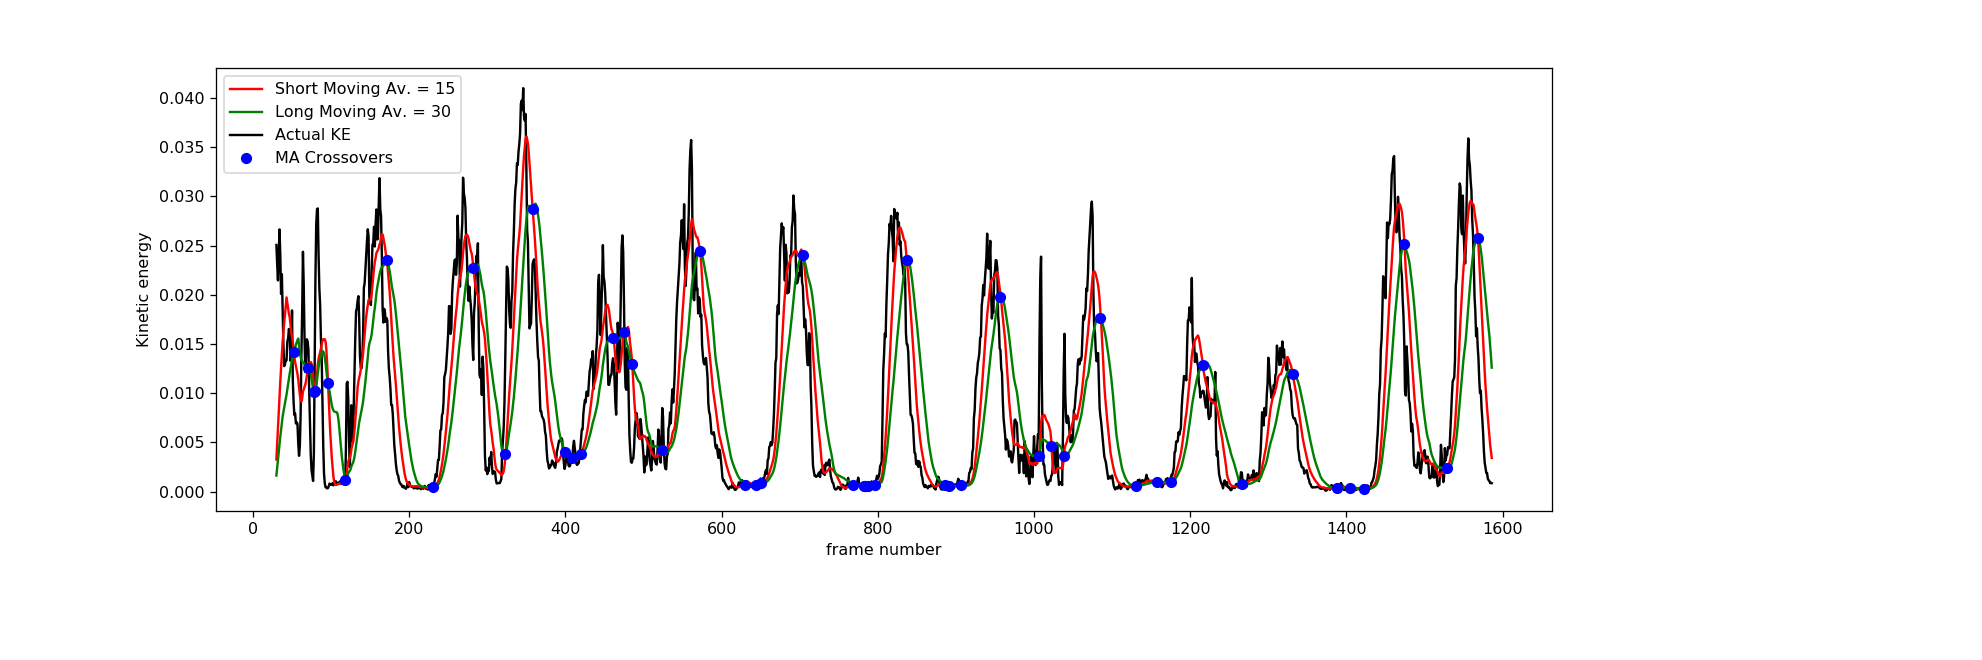

      headX  headY  headZ  neckX  neckY  neckZ  torsoX  torsoY  torsoZ  \
5114  -36.1  395.5   -6.1  -17.2  198.0   -3.4     0.0     0.0     0.0   
5132  -35.7  385.5   -6.6    6.7  198.5   -8.8     0.0     0.0     0.0   
5140  -36.0  386.0   -6.1    7.3  198.4  -11.3     0.0     0.0     0.0   
5142  -38.6  385.6   -4.1    7.5  198.4  -10.3     0.0     0.0     0.0   
5158  -33.5  394.9   -5.4    5.9  198.5  -10.4     0.0     0.0     0.0   
5180  -30.0  397.4    3.5    2.5  198.5  -11.1     0.0     0.0     0.0   
5233  -23.7  398.1   -9.2  -11.4  198.4   -4.2     0.0     0.0     0.0   
5292  -12.0  399.8  -13.3   -5.6  198.6   -5.8     0.0     0.0     0.0   
5344   22.5  396.7  -18.4   11.2  198.2   -9.2     0.0     0.0     0.0   
5385  -16.7  400.1    5.3   -7.2  198.5    1.6     0.0     0.0     0.0   
5420  -24.2  396.8  -24.8  -11.9  198.0  -12.4     0.0     0.0     0.0   
5462  -27.5  397.2  -12.3  -13.5  198.3   -5.9     0.0     0.0     0.0   
5470  -17.8  397.2   -4.6   -8.8  198.

In [18]:
##Extract keyposes for clustering
poses, pose_index = keypose("C:/Users/n0691844/Dropbox/PhD personal docs/Resources/Cornell Univ data set/person1.csv")
print(poses)

Number of clusters = 4
Cluster centres = [[-2.27565217e+01  3.97652174e+02  1.30869565e+00 -1.11173913e+01
   1.98408696e+02  7.39130435e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.42821739e+02  1.90691304e+02  4.91347826e+01
  -1.95417391e+02 -2.54782609e+01  2.70130435e+01  1.20578261e+02
   2.06104348e+02 -4.76608696e+01  1.79760870e+02 -5.02608696e+01
  -7.67826087e+01 -7.42391304e+01 -2.03460870e+02  3.08260870e+01
  -8.99826087e+01 -6.00300000e+02  4.16130435e+01  9.74043478e+01
  -1.93286957e+02 -3.25086957e+01  1.01560870e+02 -5.87065217e+02
  -8.38956522e+01 -1.70400000e+02  9.14782609e+00 -2.21217391e+02
   1.69991304e+02 -3.16308696e+02 -1.52139130e+02 -9.03913043e+01
  -8.67217391e+02  9.46478261e+01  1.34178261e+02 -8.53717391e+02
  -4.04000000e+01]
 [-2.86437500e+01  3.93281250e+02  5.60000000e+00 -1.13125000e+00
   1.98412500e+02 -5.41250000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.36612500e+02  1.98518750e+02  2.99937500e+01
  -3.37375000e+0

<IPython.core.display.Javascript object>


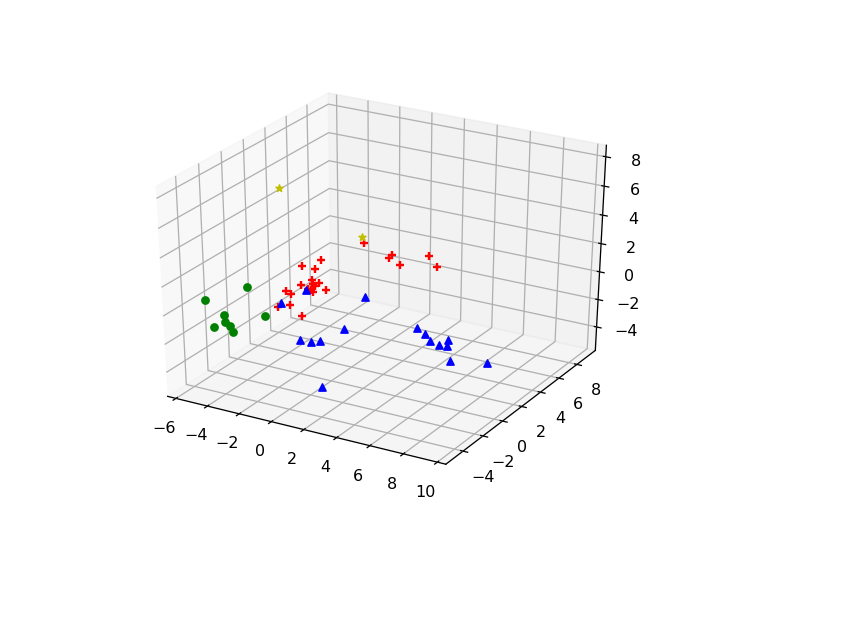

<IPython.core.display.Javascript object>


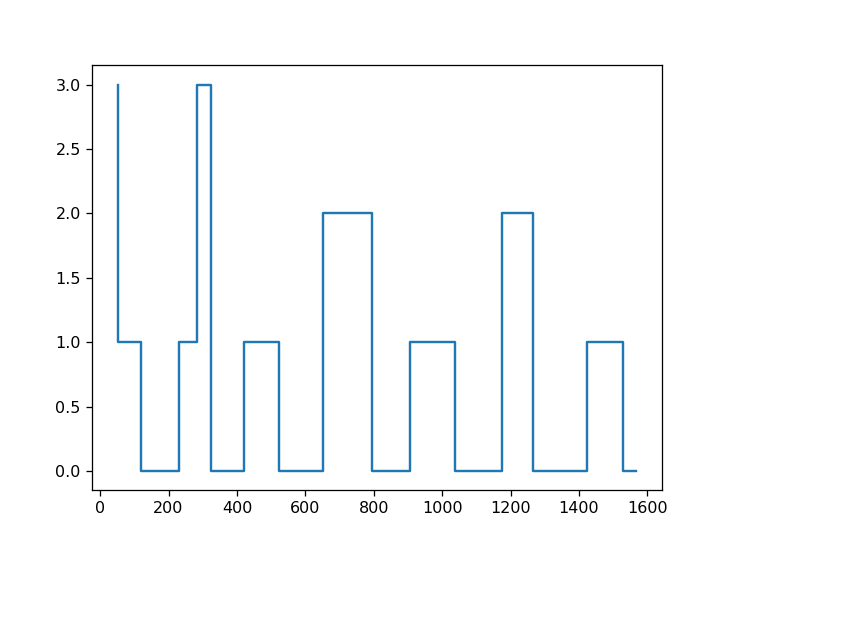

<function matplotlib.pyplot.show(*args, **kw)>

In [20]:
#Mean shift clustering with selected keyposes
keyposes = poses.drop('label', axis=1)  #drop label from poses (keyposes) selected
cluster_centers, num_clusters, pred_clusters = cluster_func(keyposes)
#print(pred_clusters.shape, pose_index.shape)


#apply pca to reduce dimension of data for plotting
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scale data before pca
scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(keyposes)

#fit data with pca
pca = PCA(n_components=3).fit(data)
pca_3d = pca.transform(data)
print(pca_3d.shape[0])
print(np.shape(pred_clusters))


fig3d = plt.figure()
ax = fig3d.add_subplot(111, projection='3d')
for i in range(0, pca_3d.shape[0]):
    if pred_clusters[i] == 0:
        c1 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='r', marker='+')
    elif pred_clusters[i] == 1:
        c2 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='b', marker='^')
    elif pred_clusters[i] == 2:
        c3 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='g', marker='o')
    elif pred_clusters[i] == 3:
        c4 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='y', marker='*')
    elif pred_clusters[i] == 4:
        c5 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='k', marker='D')
fig3d.savefig('clusterSelect.pdf', bbox_inches='tight')        
plt.show()


#plot keypose index with cluster identity
plt.figure()
plt.step(pose_index, pred_clusters)
plt.show

Number of clusters = 3
Cluster centres = [[-2.25325035e+01  3.97888520e+02  1.05435685e+00 -1.09694329e+01
   1.98425173e+02  6.70677732e-01  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.42852835e+02  1.90878147e+02  4.84358230e+01
  -2.04974965e+02 -2.39103734e+01  2.40738589e+01  1.20913831e+02
   2.05970954e+02 -4.70917012e+01  1.80059751e+02 -4.95910097e+01
  -7.51965422e+01 -7.50893499e+01 -2.03306224e+02  3.04822960e+01
  -9.04287690e+01 -6.00178147e+02  4.01280775e+01  9.68656985e+01
  -1.93488520e+02 -3.18253112e+01  1.00631397e+02 -5.87216598e+02
  -8.40665284e+01 -1.70246888e+02  1.41533887e+01 -2.23393499e+02
   1.70763347e+02 -3.16338728e+02 -1.49024758e+02 -9.02975104e+01
  -8.67098202e+02  9.39325035e+01  1.34630429e+02 -8.55262517e+02
  -4.08110650e+01]
 [-2.35020339e+01  3.95799153e+02  7.25745763e+00 -6.13135593e+00
   1.98310678e+02 -1.40779661e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.40672542e+02  1.94317458e+02  3.70479661e+01
  -3.28577458e+0

<IPython.core.display.Javascript object>


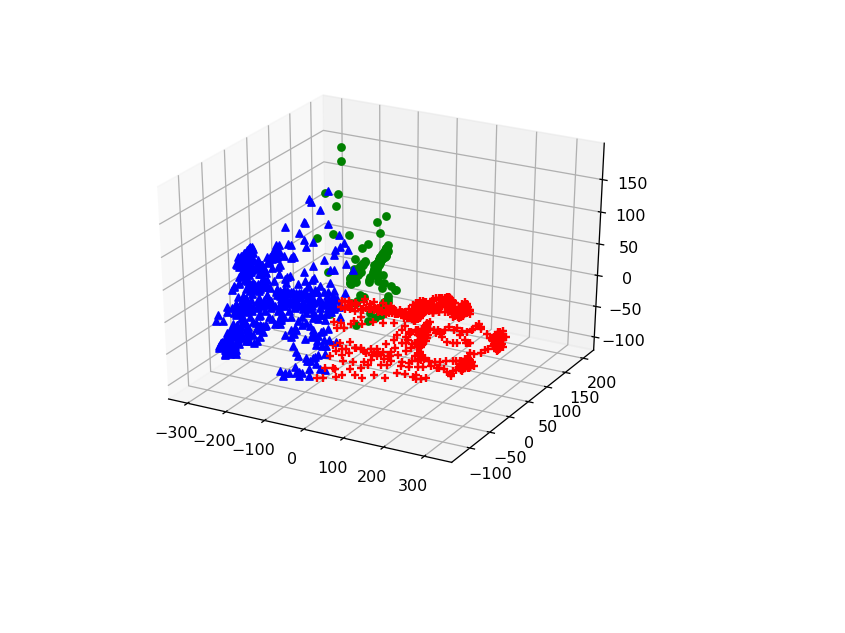

In [11]:
"""
Use all data for a selected activity and cluster to obtain the number of clusters selected this is to compare with cluster created
from selected key poses
"""
activity_label = 5  #5 for drinking water activity
read_act = pd.read_csv("C:/Users/n0691844/Dropbox/PhD personal docs/Resources/Cornell Univ data set/person1.csv")
selected_act = read_act[read_act.label == activity_label] 
selected_act = selected_act.drop('label', axis=1)
#print(selected_act)
selected_act_centres, selected_act_clusters, selected_act_pred = cluster_func(selected_act)

#scaler = StandardScaler()
#scaler = MinMaxScaler(feature_range=(-1,1))
#data = scaler.fit_transform(selected_act)
pca = PCA(n_components=3).fit(selected_act)
pca_3d = pca.transform(selected_act)
print(pca_3d.shape[0])
print(np.shape(selected_act_pred))


fig3d = plt.figure()
ax = fig3d.add_subplot(111, projection='3d')
for i in range(0, pca_3d.shape[0]):
    if selected_act_pred[i] == 0:
        c1 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='r', marker='+')
    elif selected_act_pred[i] == 1:
        c2 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='b', marker='^')
    elif selected_act_pred[i] == 2:
        c3 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='g', marker='o')
    elif selected_act_pred[i] == 3:
        c4 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='y', marker='*')
    elif selected_act_pred[i] == 4:
        c5 = ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c='k', marker='D')
        
plt.show()

In [21]:
"""
Using the selected key poses, apply a sequence learning algorithm that can capture temporal information to the information.
In this case, we apply LSTM for sequence learning and prediction
"""
#Numpy, matplotlib and pandas already imported
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

dataset = keyposes.values
labels = pred_clusters

#normalize dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

#split data into train/test 30% for testing the model 
size_train = int(len(dataset) * 0.70)
size_test = len(dataset) - size_train
x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=size_test, shuffle=False)

#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_train.shape)
#create lstm network and fit it
n_batch = 1
n_epoch = 200

model = Sequential()
model.add(LSTM(10, batch_input_shape=(n_batch, x_train.shape[1], x_train.shape[2]), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

#fit LSTM model
for i in range(n_epoch):
    model.fit(x_train, y_train, epochs=1, batch_size=n_batch, verbose=1, shuffle=False)
    model.reset_states()
    
#make batch prediction based on trained model
#This makes predicition on the entire batch to be predicted
trainPredict = model.predict(x_train, batch_size=n_batch)
model.reset_states()
testPredict = model.predict(x_test, batch_size=n_batch)
#testPredict = [round(ele) for ele in testPredict]
for i in range(len(y_train)):
    print("train activity expected = %s and predictions = %s" % (y_train[i], np.around(trainPredict[i])))
print("test activity = %s and predictions = %s" % (y_test, np.around(testPredict)))

C:\Users\n0691844\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(34, 45, 1)
Epoch 1/1
34/34 [==============================] - 3s 79ms/step - loss: 1.5362 - acc: 0.4118
Epoch 1/1
34/34 [==============================] - 1s 23ms/step - loss: 1.1659 - acc: 0.4118
Epoch 1/1
34/34 [==============================] - 1s 26ms/step - loss: 0.8778 - acc: 0.3529
Epoch 1/1
34/34 [==============================] - 1s 31ms/step - loss: 0.7743 - acc: 0.3529
Epoch 1/1
34/34 [==============================] - 1s 32ms/step - loss: 0.7540 - acc: 0.3529
Epoch 1/1
34/34 [==============================] - 1s 31ms/step - loss: 0.7457 - acc: 0.3529
Epoch 1/1
34/34 [==============================] - 1s 30ms/step - loss: 0.7393 - acc: 0.3824
Epoch 1/1
34/34 [==============================] - 1s 28ms/step - loss: 0.7331 - acc: 0.3824
Epoch 1/1
34/34 [==============================] - 1s 25ms/step - loss: 0.7272 - acc: 0.3824
Epoch 1/1
34/34 [==============================] - 1s 24ms/step - loss: 0.7215 - acc: 0.3824
Epoch 1/1
34/34 [==============================] - 1s 22ms

34/34 [==============================] - 1s 43ms/step - loss: 0.2310 - acc: 0.7353
Epoch 1/1
34/34 [==============================] - 1s 35ms/step - loss: 0.2561 - acc: 0.6765
Epoch 1/1
34/34 [==============================] - 1s 31ms/step - loss: 0.1877 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 29ms/step - loss: 0.1850 - acc: 0.8529
Epoch 1/1
34/34 [==============================] - 1s 23ms/step - loss: 0.1763 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 26ms/step - loss: 0.1763 - acc: 0.8529
Epoch 1/1
34/34 [==============================] - 1s 26ms/step - loss: 0.1722 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 26ms/step - loss: 0.1770 - acc: 0.8529
Epoch 1/1
34/34 [==============================] - 1s 26ms/step - loss: 0.1714 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 27ms/step - loss: 0.1815 - acc: 0.8235
Epoch 1/1
34/34 [==============================] - 1s 27ms/step - loss: 0.1771 -

Epoch 1/1
34/34 [==============================] - 1s 31ms/step - loss: 0.0972 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 29ms/step - loss: 0.0923 - acc: 0.9412
Epoch 1/1
34/34 [==============================] - 1s 28ms/step - loss: 0.0931 - acc: 0.8529
Epoch 1/1
34/34 [==============================] - 1s 29ms/step - loss: 0.0926 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 23ms/step - loss: 0.0853 - acc: 0.9118
Epoch 1/1
34/34 [==============================] - 1s 22ms/step - loss: 0.0871 - acc: 0.9118
Epoch 1/1
34/34 [==============================] - 1s 24ms/step - loss: 0.1069 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 23ms/step - loss: 0.1015 - acc: 0.9118
Epoch 1/1
34/34 [==============================] - 1s 23ms/step - loss: 0.1284 - acc: 0.8235
Epoch 1/1
34/34 [==============================] - 1s 23ms/step - loss: 0.0951 - acc: 0.8824
Epoch 1/1
34/34 [==============================] - 1s 23ms/step - loss